F07 Group 3

Athena 1005345 - Task 1 & 2

Chavi 1005803 - Task 1

Wenxu 1005028 - Task 3

Xavier 1005808 - Task 2

Zhengnan 1004882

In [89]:
## Import libraries that we will be using.
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import copy

Task 1 

We will be making a multiple linear regression model. THis is because we would like to model the total death rate in each country, which cannot be categorised. Hence we did not choose ligistic regression.

Preparing the data:

The variables we chose are variables that change with time, such as total cases, total vaccinations and total tests. This is because using variables independent of time such as GDP, population and median age, the data set can only be compared between countries at one particular point in time. This reduces the total number of datapoints that will be used in the regression, which will reduce the accuracy of the model. Furthermore, such variables do not seem to have a strong relationship with the covid death-rate. Since these variables can only be compared across countries, it will only be meaningful if we have specifc data on the demographics of each country. However, the dataset we have found does not have such specific data for each country. Hence we decided to use the following variables: total number of vaccinations, total number of cases and total number of tests done per country.

We cleaned the date by first removing all empty fields. Although removing the empty fields will reduce the data by a lot, the empty fields will cause inconsistencies. Furthermore, total_tests, if empty shows that the other covid data (deaths and cases) are likely to be unreliable. For example, the covid infection and death rate in Afghanistan is suspiciously low, that is because they lack test kits and hence are unable to truly find out the accurate number of cases and deaths. Hence, keeping such rows will introduce inconsistencies to the model and reduce the accuracy of it.

Since we will be predicting the death rates for each country, we split the data into many smaller dataframes for each country. We used a dictionary to store them.

The data we found is provided in absolute numbers. It does not make much sense to compare absolute values between countries as it disregards the country's population. Hence we created new variables to express these values as a ratio of the country's population.

In [378]:
df = pd.read_csv('owid-covid-data.csv') ##source: https://github.com/owid/covid-19-data/tree/master/public/data

## selecting features
data = ['location', 'date', 'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'population']
dfAll = copy.deepcopy(df.loc[:,data])

## remove empty fields to clean data
dfClean = dfAll.dropna(axis=0)

## variables dependent on time

cs = dfClean.loc[:,'location'].unique()
countries = {}
for country in cs:
    dftry = dfClean.loc[(df.loc[:,'location']==country),:]
    dftry.loc[:,'ratio_death'] = dftry.loc[:,'total_deaths']/dftry.loc[:,'total_cases']
    dftry.loc[:,'ratio_deathonpop'] = dftry.loc[:,'total_deaths']/dftry.loc[:,'population']
    dftry.loc[:,'ratio_vaxonpop'] = dftry.loc[:,'total_vaccinations']/dftry.loc[:,'population']
    dftry.loc[:,'ratio_caseonpop'] = dftry.loc[:,'total_cases']/dftry.loc[:,'population']
    dftry.loc[:,'ratio_testonpop'] = dftry.loc[:,'total_tests']/dftry.loc[:,'population']
    dftry.loc[:,'ratio_casesontest'] = dftry.loc[:,'total_cases']/dftry.loc[:,'total_tests']
    # To increase the accuracy of the model, we have to ensure that there is a sizeable number of datapoints for each country. Countries lacking enough data is removed.
    # We chose 250 as anything more than this would reduce the total number of countries analysed to be less than 20.
    if dftry.shape[0] > 250:
        countries[country]=dftry
display(countries['Argentina'])

C:\Users\Athena Chua\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Athena Chua\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,location,date,total_cases,total_deaths,total_tests,total_vaccinations,population,ratio_death,ratio_deathonpop,ratio_vaxonpop,ratio_caseonpop,ratio_testonpop,ratio_casesontest
4958,Argentina,29/12/2020,1602163.0,43018.0,4999321.0,700.0,45605823.0,0.026850,0.000943,0.000015,0.035131,0.109620,0.320476
4960,Argentina,31/12/2020,1625514.0,43245.0,5085089.0,32013.0,45605823.0,0.026604,0.000948,0.000702,0.035643,0.111501,0.319663
4964,Argentina,4/1/2021,1648940.0,43634.0,5200368.0,39599.0,45605823.0,0.026462,0.000957,0.000868,0.036156,0.114029,0.317081
4968,Argentina,8/1/2021,1703352.0,44273.0,5417852.0,107542.0,45605823.0,0.025992,0.000971,0.002358,0.037349,0.118797,0.314396
4973,Argentina,13/1/2021,1757429.0,44983.0,5645251.0,166833.0,45605823.0,0.025596,0.000986,0.003658,0.038535,0.123784,0.311311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5259,Argentina,26/10/2021,5283000.0,115866.0,24974862.0,58553162.0,45605823.0,0.021932,0.002541,1.283897,0.115840,0.547624,0.211533
5260,Argentina,27/10/2021,5284485.0,115889.0,25020448.0,58885357.0,45605823.0,0.021930,0.002541,1.291181,0.115873,0.548624,0.211207
5261,Argentina,28/10/2021,5286074.0,115916.0,25063774.0,59221612.0,45605823.0,0.021929,0.002542,1.298554,0.115908,0.549574,0.210905
5262,Argentina,29/10/2021,5287447.0,115935.0,25107049.0,59653179.0,45605823.0,0.021926,0.002542,1.308017,0.115938,0.550523,0.210596


Task 1 - Visual representation of data.

We plotted graphs individually with each variable. This allows us to see what kind of trend exists between total deaths with each variable. We eventually chose 2 variables - "ratio_vaxonpop" and "ratio_caseonpop", these are the ratios of total vaccinations as well as total cases to the total population.

We chose these variables because they have a clear positive relationship with "ratio_deathonpop", which shows that these factors contribute significantly to the death rate in each country.

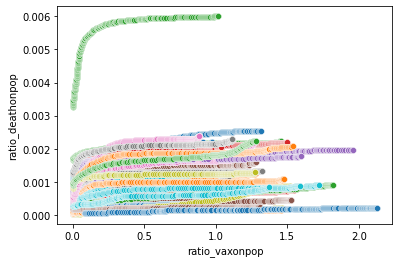

In [336]:
for country in countries:
    graph = sns.scatterplot(x='ratio_vaxonpop', y="ratio_deathonpop", data=countries[country]) ## somewhat positive linear relationship

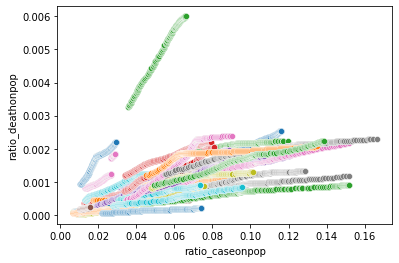

In [337]:
for country in countries:
    graph = sns.scatterplot(x='ratio_caseonpop', y="ratio_deathonpop", data=countries[country]) ## somewhat positive linear relationship

Task 1 - Building the model. 

We will be modeling the variables with the ratio of deaths to total population for each country separately. Hence our model only makes predictions for its own country. This is because every country has different demographics and socio-economic compositions, which may affect the covid death trends. We do not have data for the detailed demographics for each country, hence we will not be modelling the death rates between countries.

In [338]:
## find ln coeff for each country
def normalize_z(df):
    return (df - df.mean(axis=0)) / df.std(axis=0)
    
def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:,feature_names]
    df_target = df.loc[:,target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    new = df_feature.to_numpy()
    ones = np.ones((df_feature.shape[0], 1))
    return np.concatenate((ones,new),axis=1)

def prepare_target(df_target):
    new = df_target.to_numpy()
    return new

def compute_cost(X, y, beta):
    j = 0
    m = X.shape[0]
    e = np.matmul(X,beta)-y
    j = (1/(2*m)) * (np.matmul(e.T, e))
    return j[0][0]

def gradient_descent(X, y, beta, alpha, num_iters):
    J_storage = []
    for i in range(num_iters):
        dx = (1/(X.shape[0])) * np.matmul(X.T, (np.matmul(X, beta)-y))
        beta = beta - alpha * dx
        J = compute_cost(X, y, beta)
        J_storage.append(J)
    return beta, J_storage

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index 

    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

## perform linear regression for each country. We will store the feature and test dataframes in a dictionary
Breakdown = {}
iterations = 1500
alpha = 0.01
beta = np.zeros((3,1))
for country in countries:
    df_feature, df_target = get_features_targets(countries[country], ["ratio_vaxonpop", "ratio_caseonpop"], ["ratio_deathonpop"])
    df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, 100, 0.3)
    df_feature_train_z = normalize_z(df_feature_train)
    X = prepare_feature(df_feature_train_z)
    target = prepare_target(df_target_train)
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
    Breakdown[country] = {'ftrain':X, 'ttrain':target, 'ftest':df_feature_test, 'ttest':df_target_test, 'beta':beta}

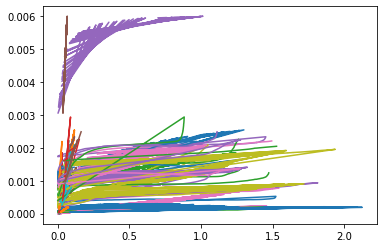

In [339]:
### make predictions
def predict_norm(X, beta):
    return np.matmul(X, beta)

def predict(df_feature, beta):
    normalised = normalize_z(df_feature)
    new = prepare_feature(normalised)
    return predict_norm(new, beta)

for country in Breakdown:
    x = Breakdown[country]['ftest']
    b = Breakdown[country]['beta']
    pred = predict(x,b)
    plt.plot(x,pred)

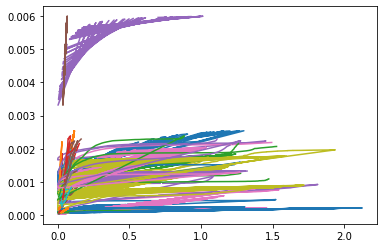

In [340]:
## printing target graph for comparison
for country in Breakdown:
    x = Breakdown[country]['ftest']
    b = Breakdown[country]['beta']
    plt.plot(x, Breakdown[country]['ttest'])

Since we created one model for each country, we will be evaluating the models individually. We will be storing all the metrics values for each country in a dictionary.

Since it is a multiple linear regression, we will be using the Root-mean-squared error (rmse) as well as the mean-absolute error (mae) as our evalutation metrics. We will be comparing this value to the range of 'actual Y' values, which in this case is the values of 'target_test' dataframe.

For each of the countries, the rmse and mae are not more than 30% of the lower bound of their respective target value, and not more than 5% of the upperbound. Hence The models are pretty accurate. 

In [380]:
### Evaluating model
def root_mean_squared_error(target, pred):
    return np.sqrt(np.sum((target-pred)**2)/target.shape[0])

def mean_absolute_error(target, pred):
    return np.sum(np.abs(target-pred))/target.shape[0]

metrics = []
for country in Breakdown:
    d = {}
    d['country'] = country
    x = Breakdown[country]['ftest']
    b = Breakdown[country]['beta']
    pred = predict(x,b)
    tar = prepare_target(Breakdown[country]['ttest'])
    rmse = root_mean_squared_error(tar, pred)
    mae = mean_absolute_error(tar, pred)
    d['rmse'] = rmse
    d['mae'] = mae
    d['tar_range'] = [tar.min(),tar.max()]
    d['beta'] = b
    metrics.append(d)
print(metrics)

[{'country': 'Argentina', 'rmse': 9.466778444422597e-05, 'mae': 8.463896301326238e-05, 'tar_range': [0.0009482341761489537, 0.0025416929763552344], 'beta': array([[1.78016680e-03],
       [9.72138183e-05],
       [2.86673492e-04],
       [1.85060358e-04]])}, {'country': 'Austria', 'rmse': 4.6018673518914196e-05, 'mae': 4.065380345066219e-05, 'tar_range': [0.0006558611940721029, 0.001257205516001642], 'beta': array([[ 1.08643487e-03],
       [-2.53087514e-05],
       [ 1.65206489e-04],
       [-6.80002415e-07]])}, {'country': 'Belgium', 'rmse': 4.213876627372687e-05, 'mae': 3.754675803844217e-05, 'tar_range': [0.0016644123182845334, 0.002234633221501377], 'beta': array([[ 2.05178135e-03],
       [-3.28001325e-05],
       [ 1.96522996e-04],
       [-1.27970374e-05]])}, {'country': 'Canada', 'rmse': 2.3651465478446513e-05, 'mae': 1.9618635841402117e-05, 'tar_range': [0.00036232614065289054, 0.0007638191250463349], 'beta': array([[ 6.30146567e-04],
       [-3.21123389e-05],
       [ 1.5737

To evaluate all our models as a whole, we will be taking the average the root-mean-squared errors as well as the mean absolute errors across all the models. The average rmse is about 5.90e-05, which compared to the range of the target values of between [3.43e-05 and 6.00e-03], is quite small. The average mae is 4.78e-05, which comapred over the same range, is quite small as well.

This inaccuracy of the model is likely due to the fact that each variable, the ratio of total vaccinations to total popultion, as well as the ratio of total cases to the total population, are not exactly linearly related to the death rate. Hence a linear regression applied to the model will result in a less accurate prediction. 

One Improvement made is to take the number of tests into account, this is because the number of tests affects the accuracy of the covid data itself. Including the number of tests done is reduced the rmse to 5.76e-05 and the mae is reduced to 4.71e-05.

In [343]:
## Displaying metrics
dfmet = pd.DataFrame.from_dict(metrics)
display(dfmet)
rmse_ave = dfmet['rmse'].mean()
mae_ave = dfmet['mae'].mean()
l = dfmet['tar_range'].min()
u = dfmet['tar_range'].max()
print(rmse_ave, mae_ave, l, u)


,country,rmse,mae,tar_range,beta
0,Argentina,0.000092,0.000085,"[0.0009482341761489537, 0.0025416929763552344]","[[0.0016959605430663515], [0.00011972546197617..."
1,Austria,0.000046,0.000041,"[0.0006558611940721029, 0.001257205516001642]","[[0.0016959605430663515], [0.00011972546197617..."
2,Belgium,0.000043,0.000038,"[0.0016644123182845334, 0.002234633221501377]","[[0.0016959605430663515], [0.00011972546197617..."
3,Canada,0.000023,0.000019,"[0.00036232614065289054, 0.0007638191250463349]","[[0.0016959605430663515], [0.00011972546197617..."
4,Chile,0.000076,0.000065,"[0.0008514309692894606, 0.0019665463309508744]","[[0.0016959605430663515], [0.00011972546197617..."
5,Denmark,0.000026,0.000021,"[0.00016771879389716895, 0.00046720435305098545]","[[0.0016959605430663515], [0.00011972546197617..."
6,Ecuador,0.000064,0.000038,"[0.0008159443896667765, 0.0018421358915243413]","[[0.0016959605430663515], [0.00011972546197617..."
7,Estonia,0.000072,0.000060,"[0.0001607319112458006, 0.001169645363525779]","[[0.0016959605430663515], [0.00011972546197617..."
8,Finland,0.000012,0.000010,"[0.00010525630902531396, 0.00020871028399197528]","[[0.0016959605430663515], [0.00011972546197617..."
9,Greece,0.000105,0.000075,"[0.00045609057862466417, 0.0015533114441997284]","[[0.0016959605430663515], [0.00011972546197617..."


5.9061433803408535e-05 4.7946694922575435e-05 [3.435420127321063e-05, 0.0008796628162603987] [0.003313187596365224, 0.005995878524848232]


In [381]:
## improvement - adding 'ratio_testonpop'
Breakdown = {}
iterations = 1500
alpha = 0.01
beta = np.zeros((4,1))
for country in countries:
    df_feature, df_target = get_features_targets(countries[country], ["ratio_vaxonpop", "ratio_caseonpop", 'ratio_testonpop'], ["ratio_deathonpop"])
    df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, 100, 0.3)
    df_feature_train_z = normalize_z(df_feature_train)
    X = prepare_feature(df_feature_train_z)
    target = prepare_target(df_target_train)
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
    Breakdown[country] = {'ftrain':X, 'ttrain':target, 'ftest':df_feature_test, 'ttest':df_target_test, 'beta':beta}

mse_all = []
metrics = []
for country in Breakdown:
    d = {}
    d['country'] = country
    x = Breakdown[country]['ftest']
    b = Breakdown[country]['beta']
    pred = predict(x,b)
    tar = prepare_target(Breakdown[country]['ttest'])
    rmse = root_mean_squared_error(tar, pred)
    mae = mean_absolute_error(tar, pred)
    d['rmse'] = rmse
    d['mae'] = mae
    d['tar_range'] = [tar.min(),tar.max()]
    d['beta'] = b
    metrics.append(d)
dfmet = pd.DataFrame.from_dict(metrics)
rmse_ave = dfmet['rmse'].mean()
mae_ave = dfmet['mae'].mean()
l = dfmet['tar_range'].min()
u = dfmet['tar_range'].max()
print(rmse_ave, mae_ave, l, u)
for i in metrics:
    print(i)

5.7511155874899426e-05 4.7141618681413136e-05 [3.435420127321063e-05, 0.0008796628162603987] [0.003313187596365224, 0.005995878524848232]
{'country': 'Argentina', 'rmse': 9.466778444422597e-05, 'mae': 8.463896301326238e-05, 'tar_range': [0.0009482341761489537, 0.0025416929763552344], 'beta': array([[1.78016680e-03],
       [9.72138183e-05],
       [2.86673492e-04],
       [1.85060358e-04]])}
{'country': 'Austria', 'rmse': 4.6018673518914196e-05, 'mae': 4.065380345066219e-05, 'tar_range': [0.0006558611940721029, 0.001257205516001642], 'beta': array([[ 1.08643487e-03],
       [-2.53087514e-05],
       [ 1.65206489e-04],
       [-6.80002415e-07]])}
{'country': 'Belgium', 'rmse': 4.213876627372687e-05, 'mae': 3.754675803844217e-05, 'tar_range': [0.0016644123182845334, 0.002234633221501377], 'beta': array([[ 2.05178135e-03],
       [-3.28001325e-05],
       [ 1.96522996e-04],
       [-1.27970374e-05]])}
{'country': 'Canada', 'rmse': 2.3651465478446513e-05, 'mae': 1.9618635841402117e-05, 'ta

Task 2 - Modelling unemployment

The social problem we have identified in relation to covid-19 is the rise in unemployment rates around the world. We will be modelling the relationship between the rate of covid infections, rate of vaccination as well as death rate with the rise in unemployment.

In [365]:
# We managed to find data for unemployment rates around the world pre-covid (2018) and post-covid(2021)

# Ensure that all countries are consistent between the 2 data sets
dfpost_covid = pd.read_csv('unemploymentworld.csv')
countries = dfpost_covid['country'].unique()

dfpre_covid = pd.read_csv('unemployment-rate-2018.csv')
dfpre_select = dfpre_covid.loc[dfpre_covid["Year"]==2018,:]
dfpre_cleaned = dfpre_select.dropna(axis=0)
dfpre_cleaned = dfpre_cleaned[dfpre_cleaned['Entity'].isin(countries)]


countries = dfpre_cleaned['Entity'].unique()
dfpost_cleaned = dfpost_covid.copy()
dfpost_cleaned = dfpost_cleaned[dfpost_covid['country'].isin(countries)]

## merge both tables
dfpre_cleaned.index=range(168) ##make indexes the same as we will be merging the 2 tables on their indexes
dfpost_cleaned.index=range(168)
dfFinal = dfpre_cleaned.join(dfpost_cleaned)

## add difference - this difference is the increase/decrease in unemployment rates pre and post covid.
dfFinal['difference'] = dfFinal.loc[:,"unemploymentRate"] - dfFinal.loc[:,'Unemployment']

## prepare covid data
## we will be using some variables for our first model
data = ['location', 'total_cases', 'total_deaths', 'total_vaccinations', 'population', 'gdp_per_capita']
dfAll = copy.deepcopy(df[data])
dfClean = dfAll.dropna(axis=0)
dfCovid = dfClean.loc[(df['date'] == '2/11/2021'), :]
dfcovid_cleaned = dfCovid[dfCovid['location'].isin(countries)]
dfcovid_cleaned.index = range(84)
dfcovid_cleaned['ratio_death'] = dfcovid_cleaned.loc[:,'total_deaths']/dfcovid_cleaned.loc[:,'total_cases']
dfcovid_cleaned['ratio_caseonpop'] = dfcovid_cleaned.loc[:,'total_cases']/dfcovid_cleaned.loc[:,'population']
dfcovid_cleaned['ratio_vaxonpop'] = dfcovid_cleaned.loc[:,'total_vaccinations']/dfcovid_cleaned.loc[:,'population']
print(dfcovid_cleaned.shape)
newcs = dfcovid_cleaned['location'].unique()
dfFinal = dfFinal[dfFinal['Entity'].isin(newcs)]

## merge covid data with unemployment table
dfFinal.index = range(84)
dfFinal = dfFinal.join(dfcovid_cleaned)
display(dfFinal)


(84, 10)


C:\Users\Athena Chua\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Athena Chua\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Athena Chua\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,Entity,Code,Year,Unemployment,country,unemploymentRate,pop2021,difference,location,total_cases,total_deaths,total_vaccinations,population,gdp_per_capita,ratio_death,ratio_deathonpop,ratio_caseonpop,ratio_vaxonpop
0,Algeria,DZA,2018,11.89,Algeria,11.7,44616.624,-0.19,Algeria,206649.0,5927.0,11224643.0,44616626.0,13913.839,0.028681,0.000133,0.004632,0.251580
1,Angola,AGO,2018,7.00,Angola,6.6,33933.610,-0.40,Angola,64487.0,1713.0,6647925.0,33933611.0,5819.495,0.026563,0.000050,0.001900,0.195910
2,Argentina,ARG,2018,9.22,Argentina,8.1,45605.826,-1.12,Argentina,5291285.0,116010.0,60414001.0,45605823.0,18933.907,0.021925,0.002544,0.116022,1.324699
3,Australia,AUS,2018,5.30,Australia,5.6,25788.215,0.30,Australia,174276.0,1768.0,35989833.0,25788217.0,44648.710,0.010145,0.000069,0.006758,1.395592
4,Austria,AUT,2018,4.85,Austria,5.5,9043.070,0.65,Austria,840902.0,11380.0,11562035.0,9043072.0,45436.686,0.013533,0.001258,0.092989,1.278552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,United States,USA,2018,3.90,United States,4.4,332915.073,0.50,United States,46173367.0,748518.0,427779893.0,332915074.0,54225.446,0.016211,0.002248,0.138694,1.284952
80,Uruguay,URY,2018,8.34,Uruguay,7.3,3485.151,-1.04,Uruguay,394248.0,6080.0,6621794.0,3485152.0,20551.409,0.015422,0.001745,0.113122,1.900001
81,Uzbekistan,UZB,2018,5.71,Uzbekistan,4.9,33935.763,-0.81,Uzbekistan,186793.0,1329.0,26469699.0,33935765.0,6253.104,0.007115,0.000039,0.005504,0.779994
82,Vietnam,VNM,2018,1.16,Vietnam,2.2,98168.833,1.04,Vietnam,932357.0,22205.0,84090899.0,98168829.0,6171.884,0.023816,0.000226,0.009497,0.856595


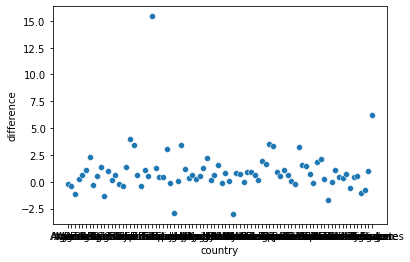

In [359]:
## Change in unemployment rate
graph = sns.scatterplot(x="country", y='difference', data=dfFinal)

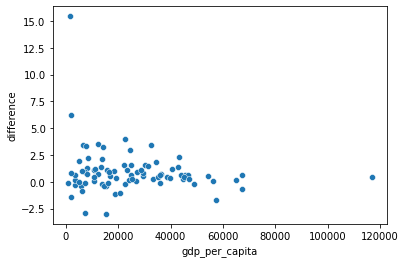

In [360]:
## Data visualisation
## Same as we did for task 1, we plotted graphs individually for each variable to identify (remotely) obvious trends between them and the difference in unemployment rates.
## 2 variables identified was the ratio of vaccinations to population, as well as the GDP per capita of the country
graph = sns.scatterplot(x="gdp_per_capita", y='difference', data=dfFinal)

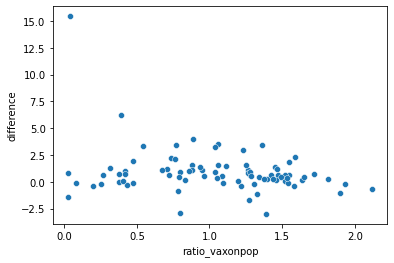

In [361]:
graph = sns.scatterplot(x="ratio_vaxonpop", y='difference', data=dfFinal)

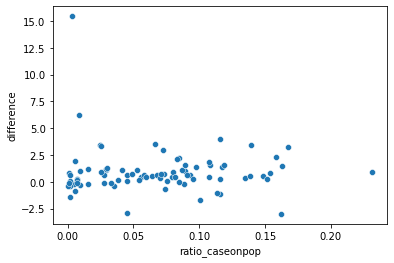

In [362]:
graph = sns.scatterplot(x="ratio_caseonpop", y='difference', data=dfFinal)

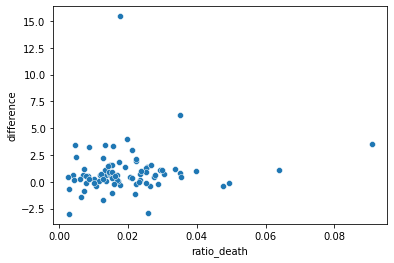

In [372]:
graph = sns.scatterplot(x="ratio_death", y='difference', data=dfFinal)

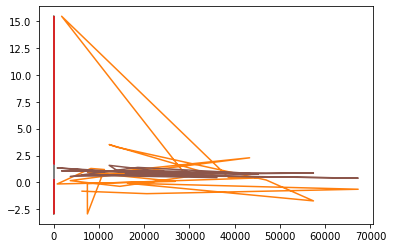

In [373]:
## Build model. For this task we are using a linear regression model as well, hence we will be using the same functions from task 1.

iterations = 1500
alpha = 0.01
beta = np.zeros((5,1))
df_feature, df_target = get_features_targets(dfFinal, ['ratio_vaxonpop', 'gdp_per_capita', 'ratio_caseonpop', 'ratio_death'], ["difference"])
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, 100, 0.3)
df_feature_train_z = normalize_z(df_feature_train)
X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_train)
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
pred = predict(df_feature_test, beta)
plt.plot(df_feature_test,df_target_test)
plt.plot(df_feature_test,pred)

In [374]:
## evaluating model - using Mean-squared-error
tar = prepare_target(df_target_test)
rmse = root_mean_squared_error(tar, pred)
mae = mean_absolute_error(tar,pred)
print(rmse, mae)

3.1766193319436673 1.5782728426914934


The model is not accurate as the rmse is 3.17 for datapoints between -1 to 6. This is likely due to the size of the data set, which is too small to show an obvious increasing or decreasing trend. It could also be due to outliers, as seen in the graphs plotted above.

An improvement is to remove the outliers using the 1.5IQR rule, as well as to remove one of the variables. With this, the rmse value decreased to 0.612, and the mae decreased to 0.484.

0.6116561920882415 0.48422840603545525


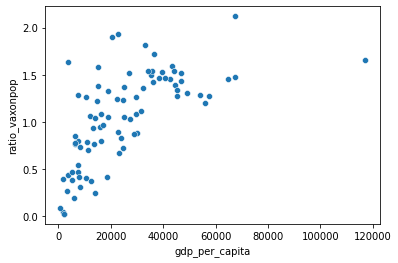

In [375]:
### improvement of model
# Plot graph of gdp vs ratio of vaccinations/population
graph = sns.scatterplot(x='gdp_per_capita', y='ratio_vaxonpop', data=dfFinal)
## There is a close positive linear relationship between them. To improve the model, we should remove the colinearity.
## Hence, we removed the GDP variable.

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = dfFinal['difference'].quantile(0.25)
Q3 = dfFinal['difference'].quantile(0.75)
IQR = Q3 - Q1
filtered = dfFinal.query('(@Q1 - 1.5 * @IQR) <= difference <= (@Q3 + 1.5 * @IQR)')

#make prediction
beta = np.zeros((4,1))
df_feature, df_target = get_features_targets(filtered, ['ratio_vaxonpop', 'ratio_caseonpop', 'ratio_death'], ["difference"])
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, 100, 0.3)
df_feature_train_z = normalize_z(df_feature_train)
X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_train)
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
pred = predict(df_feature_test, beta)
    
tar = prepare_target(df_target_test)
rmse = root_mean_squared_error(tar, pred)
mae = mean_absolute_error(tar,pred)
print(rmse, mae)